# CSV 파일 다루기와 데이터 시각화

#### 수정 사항

* 좀 더 복잡한 csv 데이터 활용 예제 추가 필요

## 주요 내용

데이터 분석을 위해 가장 기본적으로 할 수 있고, 해야 하는 일이 데이터 시각화이다. 
데이터를 시각화하는 것은 어렵지 않지만, 적합한 시각화를 만드는 일은 매우 어려우며,
많은 훈련과 직관이 요구된다.

여기서는 데이터를 탐색하여 얻어진 데이터를 시각화하는 기본적인 방법 네 가지를 배운다.

* 선그래프
* 막대그래프
* 히스토그램
* 산점도

## 오늘이 주요 예제

서울과 수도권의 1949년부터 2010년까지 인구증가율 데이터가 아래와 같다.

<p>
<table cellspacing="20">

<tr>
<td>
<img src="images/Seoul_pop04.jpg" style="width:360">
</td>
</tr>

</table>
</p>

이제 위 파일을 읽어서 서울과 수도권의 인구증가율 추이를 아래 그림에서처럼 선그래프로 나타내 보자.

<p>
<table cellspacing="20">

<tr>
<td>
<img src="images/Seoul_pop05.png" style="width:360">
</td>
</tr>

</table>
</p>

## 데이터 시각화 도구 소개: `matplotlib` 라이브러리

데이터 시각화를 위한 도구 중에서 간단한 막대 그래프, 히스토그램, 선 그래프, 산점도를 쉽게 그릴 수 있는
많은 도구들을 포함한 라이브러리이다. 
이 라이브러리에 포함된 모듈 중에서 여기서는 `pyplot` 모듈에 포함된 가장 기본적인 몇 개의 도구들의 활용법을
간단한 예제를 배우고자 한다.

In [1]:
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## 선그래프


`data` 디렉토리의 `Seoul_pop1.csv` 파일에는 1949년부터 5년 간격으로 측정된 서울시 인구수를 담은 데이터가 
들어 있으며, 그 내용은 다음과 같다.

```
1949    1,437,670
1955    1,568,746
1960    2,445,402
1966    3,793,280
1970    5,525,262
1975    6,879,464
1980    8,350,616
1985    9,625,755
1990   10,603,250
1995   10,217,177
2000    9,853,972
2005    9,762,546
2010    9,631,482
```
출처: 국가통계포털(kosis.kr)

### 파일에서 데이터 목록 추출하기

연도별 서울시 인구수의 연도별 변화추이를 간단한 선그래프를 이용하여 확인하려면,
먼저 x축에 사용될 년도 목록과 y축에 사용될 인구수 목록을 구해야 한다.

먼저 이전에 배운 기술을 활용하고, 이후에 보다 쉽게 활용하는 고급기술을 활용한다.

**주의:** 확장자가 csv인 파일은데이터가 쉼표(콤마)로 구분되어 정리되어 있는 파일을 의미한다.
csv는 Comma-Separated Values의 줄임말이다. 
따라서, csv 파일을 읽어들인 후, 각 줄을 쉼표 기준으로 분리(split)하면 이전에 공백 기분으로 데이터를 쪼개는 방식과
동일한 결과를 얻을 수 있다. 즉, `split` 메소드의 인자로 여기서는 쉼표를 사용하면 된다.

In [3]:
data_f = open("data/Seoul_pop1.csv")

# 년도 리스트
years = []
# 인구수 리스트
populations = []

for line in data_f: 
    (year, population) = line.split(',')       
    years.append(int(year))
    populations.append(int(population))

data_f.close() 

In [4]:
print(years)

[1949, 1955, 1960, 1966, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010]


In [5]:
print(populations)

[1437670, 1568746, 2445402, 3793280, 5525262, 6879464, 8350616, 9625755, 10603250, 10217177, 9853972, 9762546, 9631482]


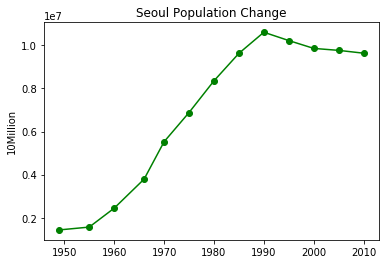

In [6]:
# 그래프를 그릴 도화지 준비하기
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# x축에 년도, y축에 인구수가 있는 선 그래프 만들기
plt.plot(years, populations, color='green', marker='o', linestyle='solid')

# 제목 더하기
plt.title("Seoul Population Change")

# y축에 레이블 추가하기
plt.ylabel("10Million")
plt.show()

## 막대그래프

동일한 데이터를 막대그래프를 이용하여 보여줄 수 있다.
그렇게 하면 년도별 미세한 차이를 보다 자세히 나타낼 수 있다.

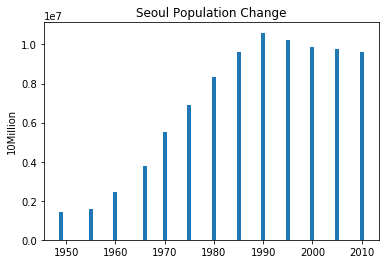

In [7]:
# 그래프를 그릴 도화지 준비하기
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 막대그래프 그리기
plt.bar(years, populations)

# 제목 더하기
plt.title("Seoul Population Change")

# y축에 레이블 추가하기
plt.ylabel("10Million")
plt.show()

그런데 이렇게 하면 막대 그래프의 두께가 좀 좁아 보인다. 그리고
년도가 정확히 5년 단위로 쪼개진 것이 아니기에 막대들 사이의 간격이 불규칙해 보인다.
따라서 먼저 막대의 두께를 좀 조절해보자.

**힌트:** `plt.bar()` 함수의 세 번째 인자는 막대들의 두께를 지정한다.

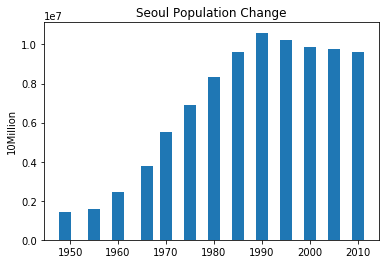

In [8]:
# 그래프를 그릴 도화지 준비하기
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 막대그래프 그리기, 막대 두께 조절
plt.bar(years, populations, 2.5)

# 제목 더하기
plt.title("Seoul Population Change")

# y축에 레이블 추가하기
plt.ylabel("10Million")
plt.show()

막대들의 간격이 완전히 규칙적으로 되지는 않았지만 이전 그래프와는 좀 다른 느낌을 준다. 
이와 같이 막대들의 두께 뿐만아니라, 간격, 색상 모두 조절할 수 있지만, 
여기서는 그럴 수 있다는 사실만 언급하고 넘어간다.

### 예제

대한민국이 하계 올림픽에서 가장 많은 메일을 획득한 상위 여섯 종목과 메달 숫자는 아래와 같다.

<p>
<table cellspacing="20">

<tr>
    <td>종목</td>
    <td>메달 수</td>
</tr>
<tr>
    <td>Archery(양궁)</td>
    <td>39</td>
</tr>
<tr>
    <td>Badminton(배드민턴)</td>
    <td>19</td>
</tr>
<tr>
    <td>Boxing(복싱)</td>
    <td>20</td>
</tr>
<tr>
    <td>Judo(유도)</td>
    <td>43</td>
</tr>
<tr>
    <td>Taekwondo(태권도)</td>
    <td>19</td>
</tr>
<tr>
    <td>Wrestling(레슬링)</td>
    <td>36</td>
</tr>

<caption align='bottom'>출처: 위키피디아</caption>
</table>
</p>

이제 위 데이터를 막대 그래프로 시각화할 수 있다.

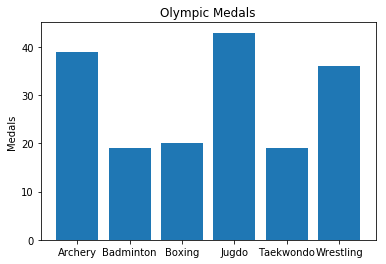

In [9]:
sports = ['Archery', 'Badminton', 'Boxing', 'Jugdo', 'Taekwondo', 'Wrestling']
medals = [39, 19, 20, 43, 19, 36]

plt.bar(sports, medals)
plt.ylabel("Medals")
plt.title("Olympic Medals")
plt.show()

x축에 종목 이름 대신에 숫자를 넣을 수도 있지만 정확한 정보를 전달하지는 못한다.

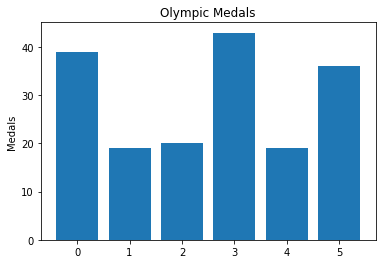

In [10]:
sports = ['Archery', 'Badminton', 'Boxing', 'Jugdo', 'Taekwondo', 'Wrestling']
medals = [39, 19, 20, 43, 19, 36]

plt.bar(range(6), medals)
plt.ylabel("Medals")
plt.title("Olympic Medals")
plt.show()

따라서 x축에 6개의 막대가 필요하고 각각의 막대에 레이블 형식으로 종목 이름을 지정해야 한다.

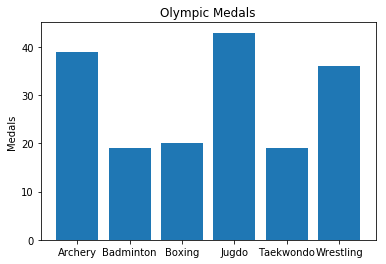

In [11]:
sports = ['Archery', 'Badminton', 'Boxing', 'Jugdo', 'Taekwondo', 'Wrestling']
medals = [39, 19, 20, 43, 19, 36]

xs = range(6)
plt.bar(xs, medals)

plt.xticks(xs, sports)

plt.ylabel("Medals")
plt.title("Olympic Medals")
plt.show()

여전히 그래프가 좀 어색하다. 막대들이 좀 두껍다. 이럴 때는 x축에 사용되는 점들의 간격을 좀 벌리는 게 좋다.

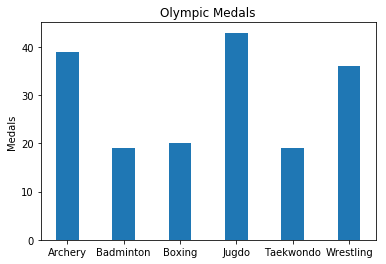

In [12]:
sports = ['Archery', 'Badminton', 'Boxing', 'Jugdo', 'Taekwondo', 'Wrestling']
medals = [39, 19, 20, 43, 19, 36]

xs = range(0, 12, 2)
plt.bar(xs, medals)

plt.xticks(xs, sports)

plt.ylabel("Medals")
plt.title("Olympic Medals")
plt.show()

이번에는 막대 두께가 좁아 보인다. 그래서 좀 넓히는 게 좋다.

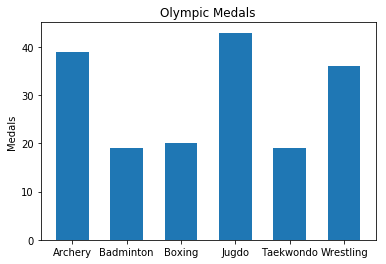

In [13]:
sports = ['Archery', 'Badminton', 'Boxing', 'Jugdo', 'Taekwondo', 'Wrestling']
medals = [39, 19, 20, 43, 19, 36]

xs = range(0, 12, 2)
plt.bar(xs, medals, 1.2)

plt.xticks(xs, sports)

plt.ylabel("Medals")
plt.title("Olympic Medals")
plt.show()

지금까지 살펴보았듯이 적합한 시각화는 경우에 따라 상당히 많은 노력을 요구하기도 한다.
여기서는 `matplotlib.pyplot` 라이브러리에 다양한 설정 옵션이 있다는 정도만 기억하면 좋겠다.

## 히스토그램

히스토 그램은 막대그래프와 비슷하다. 다만 막대 사이에 공간이 없다. 
따라서 연속적인 구간으로 구분된 범위에 포함된 숫자들의 도수를 나타내는 데에 효과적이다.

아래 예제는 임의로 생성된 1000개의 실수들의 분포를 보여주는 히스토그램이다. 

**주의:** 
* numpy 모듈의 randn 함수는 표준정규분포를 따르도록 실수들을 임의로 생성한다. 
* 표준정규분포: 데이터들의 평균이 0이고 표준편차가 1인 정규분포
* 여기서는 표준정규분포가 확률과 통계 분야에서 매우 중요한 역할을 수행한다는 정도만 알고 넘어간다. 

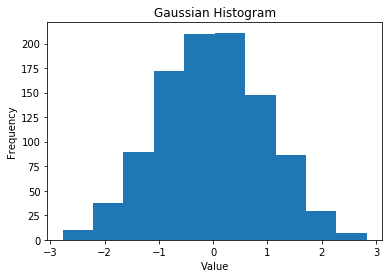

In [14]:
import numpy as np

gaussian_numbers = np.random.randn(1000)
plt.hist(gaussian_numbers, bins=10)

plt.title("Gaussian Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

## 산점도

두 변수 간의 연관관계를 보여 주는 데에 매우 적합한 그래프이다. 

예를 들어, 카카오톡에 등록된 친구 수와 하룻동안의 스마트폰 사용시간 사이의 연관성을 보여주는 데이터가 아래와 같이 주어졌다고 하자.

**주의:** 아래 데이터는 강의를 위해 임의로 조작되었으며, 어떠한 근거도 갖지 않는다.

In [15]:
num_friends = [41,  26,  90,  50,  18,  124, 152, 88,  72,  51]
phone_time =  [4.1, 3.3, 5.7, 4.2, 3.2, 6.4, 6.0, 5.1, 6.2, 3.7]

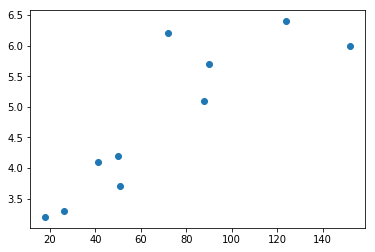

In [16]:
plt.scatter(num_friends, phone_time)
plt.show()

위 산점도를 보면 카카오톡에 등록된 친구 수가 많을 수록 스마트폰 사용시간이 증가하는 경향을 한 눈에 확인할 수 있다.
물론, 이는 주어진 (조작된) 데이터에 근거한 정보이다. 

## 오늘의 주요 예제 해결

서울과 수도권의 1949년부터 2010년까지 인구증가율 데이터가 아래와 같다.

<p>
<table cellspacing="20">

<tr>
<td>
<img src="images/Seoul_pop04.jpg">
</td>
</tr>

</table>
</p>

위 도표의 데이터는 `'Seoul_pop2.csv'` 파일에 아래와 같이 저장되어 있다.

---
```
### 1949년부터 2010년 사이의 서울과 수도권 인구 증가율(%)
# 구간,서울,수도권 

1949-1955,9.12,-5.83
1955-1960,55.88,32.22
1960-1966,55.12,32.76
1966-1970,45.66,28.76
1970-1975,24.51,22.93
1975-1980,21.38,21.69
1980-1985,15.27,18.99
1985-1990,10.15,17.53
1990-1995,-3.64,8.54
1995-2000,-3.55,5.45
2000-2005,-0.93,6.41
2005-2010,-1.34,3.71
```
---

이제 위 파일을 읽어서 서울과 수도권의 인구증가율 추이를 선그래프로 나타내 보자.

### 단계 1: csv 파일 읽어드리기

확장자가 csv인 파일은 데이터를 저장하기 위해 주로 사용한다. 

csv 파일을 읽어드리는 방법은 `csv` 모듈의 `reader()` 함수를 활용하면 매우 쉽다.

In [17]:
import csv

In [18]:
with open('data/Seoul_pop2.csv') as f:
    reader = csv.reader(f)
    for row in reader:
        if len(row) == 0 or row[0][0] == '#':
            continue
        else:
            print(row)

['1949-1955', '9.12', '-5.83']
['1955-1960', '55.88', '32.22']
['1960-1966', '55.12', '32.76']
['1966-1970', '45.66', '28.76']
['1970-1975', '24.51', '22.93']
['1975-1980', '21.38', '21.69']
['1980-1985', '15.27', '18.99']
['1985-1990', '10.15', '17.53']
['1990-1995', '-3.64', '8.54']
['1995-2000', '-3.55', '5.45']
['2000-2005', '-0.93', '6.41']
['2005-2010', '-1.34', '3.71']


`csv.reader` 함수의 리턴값은 csv 파일의 내용을 줄 별로 리스트로 저장한 특별한 자료형이다.
여기서는 위 예제처럼 사용하는 정도만 기억하면 된다.

In [19]:
type(reader)

_csv.reader

**주의:** 위 코드의 5번 줄을 아래와 같이 하면 오류 발생
```
if row[0][0] == '#' or len(row) == 0:
```

이유: `'A or B'`의 경우 먼저 `A`의 참, 거짓을 먼저 판단한 후에, A참이면 참으로 처리하고 끝낸다.
그리고 A가 거짓이면 그제서야 B의 참, 거짓을 확인한다. 
그래서 A의 참, 거짓을 판단하면서 오류가 발생하면 바로 멈추게 된다.

위 예제의 경우 `row[0][0]`이 셋째줄의 인덱스 오류가 발생하게 되서 코드 전체가 멈추게 된다.

**주의:** 

다음 형식은
```python
with open('Seoul_pop2.csv') as f:
    코드
``` 

아래 코드에 대응한다.
```python
f = open('Seoul_pop2.csv')
코드
f.close()
```

### 단계 2: 선그래프에 사용될 데이터 정리하기

In [20]:
year_intervals = []
Seoul_pop = []
Capital_region_pop = []

with open('data/Seoul_pop2.csv') as f:
    reader = csv.reader(f)
    for row in reader:
        if len(row) == 0 or row[0][0] == '#':
            continue
        else:
            year_intervals.append(row[0])
            Seoul_pop.append(float(row[1]))
            Capital_region_pop.append(float(row[2]))

In [21]:
print(year_intervals)

['1949-1955', '1955-1960', '1960-1966', '1966-1970', '1970-1975', '1975-1980', '1980-1985', '1985-1990', '1990-1995', '1995-2000', '2000-2005', '2005-2010']


In [22]:
print(Seoul_pop)

[9.12, 55.88, 55.12, 45.66, 24.51, 21.38, 15.27, 10.15, -3.64, -3.55, -0.93, -1.34]


In [23]:
print(Capital_region_pop)

[-5.83, 32.22, 32.76, 28.76, 22.93, 21.69, 18.99, 17.53, 8.54, 5.45, 6.41, 3.71]


### 단계 3: 그래프 그리기

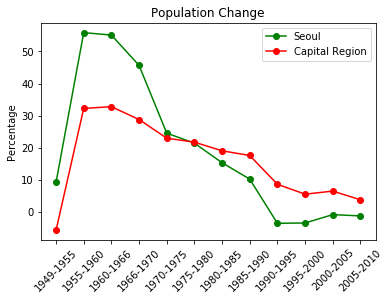

In [24]:
# 그래프를 그릴 도화지 준비하기
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# x축에 년도, y축에 인구수가 있는 선 그래프 만들기
plt.plot(range(12), Seoul_pop, color='green', marker='o', linestyle='solid', \
         label='Seoul')
plt.plot(range(12), Capital_region_pop, color='red', marker='o', linestyle='solid', \
         label='Capital Region')

plt.xticks(range(12), year_intervals, rotation=45)

plt.title("Population Change")
plt.ylabel("Percentage")

plt.legend()
plt.show()

## 연습문제

### 연습

원그래프(파이 차트)는 각 구성 요소가 전체에서 차지하는 비중을 한 눈에 알아볼 수 있도록 도와주는 그래프이다. 
`matplotlib` 라이브러리를 이용하여 원그래프를 그리기 위해서는 `pie` 함수를 활용하면 된다. 

아래 코드는 한 학년 `A`, `B`, `C`, `D` 네 반 학생들의 숫자를 해당 학년 전체 학생들에서 차지하는 비중을 원그래프로
보여준다.

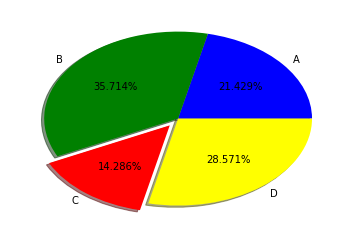

In [25]:
classes = ['A', 'B', 'C', 'D']
slices = [30, 50, 20, 40]                # 하나의 조각을 의미하는 slice 변수이름 활용

colors = ['Blue', 'Green', 'Red', 'Yellow']
explode = [0.0, 0.0, 0.1, 0.0]          # 특정 조각을 돌출시키고자 할 때 사용

plt.pie(slices, explode = explode, autopct = '%2.3f%%', shadow = True, \
        colors = colors, labels = classes)

plt.show()

코드 설명:

* `classes`: 각 학급의 이름의 리스트
* `slices`: 각 학급의 학생 수의 리스트. 
* `labels`: 각 학급에 해당하는 조각을 지정하는 색의 리스트 


* `explode`: 특정 조각을 돌출시켜 강조하기 위한 값 지정
* `autopct`: 각 조각의 전체 대비 백분율 표시방법 지정 (부동소수점 서식 활용)
* `shadow`: 원 그래프에 그림자 추가 여부 확인